# Case - resolução de problema de negócio

## 1. Problema


Suponha que você começou a trabalhar em uma empresa que vende picolé na praia. O verão está chegando e é o momento crucial para a sua empresa fazer boas vendas, com o mínimo de custo, aumentando assim a rentabilidade do negócio! Os carrinhos de sorvete aguentam bem o dia-dia na praia, porém, dependendo do tipo de areia e da temperatura no local, pode acabar acontecendo dos carrinhos precisarem de manutenção. Portanto, a sua empresa precisa de boas vendas e o mínimo custo com manutenção com carrinhos! E você foi contratado para isso, para ajudá-la a encontrar o melhor modelo de negócio.

## 2. Problema de Negócio

A sua função é ajudar a empresa a encontrar a melhor política de envio de carrinhos de picolé para as praias do litoral. Se a política atual não estiver ótima, a sua função é propor uma nova dado o contexto apresentado.

Monte uma apresentação com detalhes sobre a sua proposta de mudança, pensando no porquê de cada escolha e decisão. Os números são fictícios, e você poderá utilizá-los para explicar a sua decisão.

## Lendo os dados

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Desativar todos os warnings
warnings.filterwarnings("ignore")

In [ ]:
# df = pd.read_csv('case_itau.csv', encoding='utf-8') -> Exibe um erro dizendo que não foi possivel fazer a codificação do documento, visto que não se trata de um utf-8

A biblioteca está com dificuldade em criar o dataset por não conseguir decifrar o encoding do documento.


In [2]:
import chardet

with open('case_itau.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [3]:
df = pd.read_csv('case_itau.csv', encoding=result['encoding'])

In [ ]:
df.shape

(648, 1)

In [ ]:
df.head()

,Data Base;Score Inicial;Score Final;Tempo que estão no litoral trabalhando (meses);Quantidade de Carrinhos de Picolé;Quantidade de Carrinhos de Picolé danificados;
0,203301;500;550;0;2960;0;
1,203301;500;550;1;2960;0;
2,203301;500;550;2;2960;28;
3,203301;500;550;3;2960;62;
4,203301;500;550;4;2960;86;


Aparentemente o dataframe foi criado sem identificar a separação por ';'

In [ ]:
df = pd.concat([df[col].str.split(';', expand=True) for col in df.columns], axis=1)

In [ ]:
df.shape

(648, 7)

In [ ]:
df.head()

,0,1,2,3,4,5,6
0,203301,500,550,0,2960,0,
1,203301,500,550,1,2960,0,
2,203301,500,550,2,2960,28,
3,203301,500,550,3,2960,62,
4,203301,500,550,4,2960,86,


Os nomes das colunas foram descartado propositalmente para que possamos renomea-las afim de deixar mais facil a nossa manipulação na tabela

## Tratamento dos dados

In [ ]:
df.drop(6, axis=1, inplace=True)

In [ ]:
df.rename(columns={0: 'database', 1: 'score_inicial', 2: 'score_final', 3: 'meses_de_trabalho', 4: 'qntd_carrinhos', 5: 'qntd_carrinhos_danificados'}, inplace=True)

In [ ]:
df.head()

,database,score_inicial,score_final,meses_de_trabalho,qntd_carrinhos,qntd_carrinhos_danificados
0,203301,500,550,0,2960,0
1,203301,500,550,1,2960,0
2,203301,500,550,2,2960,28
3,203301,500,550,3,2960,62
4,203301,500,550,4,2960,86


In [ ]:
df.shape

(648, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   database                    648 non-null    object
 1   score_inicial               648 non-null    object
 2   score_final                 648 non-null    object
 3   meses_de_trabalho           648 non-null    object
 4   qntd_carrinhos              648 non-null    object
 5   qntd_carrinhos_danificados  648 non-null    object
dtypes: object(6)
memory usage: 30.5+ KB


Podemos constatar que não há nenhum valor ausente, mas há um erro. As colunas estão identificadas como tipo "object", quando na verdade são todas do tipo INT

---


Para realizar a mudança dos tipos de dados, será utilizado modulos importados

Os módulos a seguir foram criados durante o curso de Formação Analista de Dados (FADA) da Data Science Academy com auxilio do professor em video aula

Os módulos se tratam de técnicas de tratamento de dados que podem ser reutilizadas em diferentes casos e análises, sendo necessária somente a importação do mesmo

A seguir segue a descrição de cada módulo

valores_ausentes.py -
- identifica a porcentagem de valores ausentes
- diversas funções com técnicas de tratamentos dos valores ausentes, sendo elas:
    - imputação (bfill, ffill, media e mediana)
    - drop de linhas ou colunas

conversao.py - Modulos de conversão dos tipos de dados para
- data
- string
- int64
- fator

outliers.py -
- identifica a porcentagem de outliers
- realiza o tratamento desses outliers (podendo ser o drop/exclusão dos mesmos, ou replace/modificação)


In [ ]:
from conversao import *
df.dtypes

database                      object
score_inicial                 object
score_final                   object
meses_de_trabalho             object
qntd_carrinhos                object
qntd_carrinhos_danificados    object
dtype: object

In [ ]:
# Pegando todas as colunas
converter = list(df.columns)
converter

['database',
 'score_inicial',
 'score_final',
 'meses_de_trabalho',
 'qntd_carrinhos',
 'qntd_carrinhos_danificados']

In [ ]:
convert_to_int(df, converter)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   database                    648 non-null    int64
 1   score_inicial               648 non-null    int64
 2   score_final                 648 non-null    int64
 3   meses_de_trabalho           648 non-null    int64
 4   qntd_carrinhos              648 non-null    int64
 5   qntd_carrinhos_danificados  648 non-null    int64
dtypes: int64(6)
memory usage: 30.5 KB


## EDA


In [ ]:
df.head(12)

,database,score_inicial,score_final,meses_de_trabalho,qntd_carrinhos,qntd_carrinhos_danificados
0,203301,500,550,0,2960,0
1,203301,500,550,1,2960,0
2,203301,500,550,2,2960,28
3,203301,500,550,3,2960,62
4,203301,500,550,4,2960,86
5,203301,500,550,5,2960,103
6,203301,500,550,6,2960,124
7,203301,500,550,7,2960,126
8,203301,500,550,8,2960,128
9,203301,500,550,9,2960,135


In [ ]:
df.describe()

,database,score_inicial,score_final,meses_de_trabalho,qntd_carrinhos,qntd_carrinhos_danificados
count,648.000000,648.000000,648.000000,648.00000,648.000000,648.000000
mean,203304.259259,675.875000,725.000000,4.37037,3931.828704,81.757716
std,2.475364,114.844299,114.652893,3.14294,1852.620728,76.260383
min,203301.000000,500.000000,550.000000,0.00000,1328.000000,0.000000
25%,203302.000000,588.500000,637.500000,2.00000,2650.000000,19.750000
50%,203304.000000,676.000000,725.000000,4.00000,3474.000000,65.000000
75%,203306.000000,763.500000,812.500000,7.00000,4835.000000,124.000000
max,203309.000000,851.000000,900.000000,12.00000,10257.000000,374.000000


Inicialmente acreditei que a coluna 'database' se tratasse de uma série temporal. Analisando posteriormente, percebi que a coluna 'database' é uma identificação para a empresa identificar e monitorar os mesês de trabalho com uma quantidade de carrinhos. Com isso, entende-se que nosso foco em questão é análisar a junção dessas identificação e entender qual o melhor cenário em que se danifica menos carrinhos

O padrão dos dados segue o seguinte:

*   Identificação (20330X) Onde o X varia de 1 a 9 ->
    *   Score Inicial x Final (Sempre em uma diferença Δ = 50)
    *   Série temporal em meses
    *   Variação na quantidade total de carrinhos dispostos ao trabalho



A seguir serão criadas novas colunas (engenharia de atributos) afim de facilitar a análise

In [ ]:
# Copia do DF para não realizar uma alteração errada e comprometer nossos dados.
new_df = df.copy()

In [ ]:
new_df['perc_danificados'] = (df['qntd_carrinhos_danificados'] / df['qntd_carrinhos']) * 100

In [ ]:
new_df.head(20)

,database,score_inicial,score_final,meses_de_trabalho,qntd_carrinhos,qntd_carrinhos_danificados,perc_danificados
0,203301,500,550,0,2960,0,0.000000
1,203301,500,550,1,2960,0,0.000000
2,203301,500,550,2,2960,28,0.945946
3,203301,500,550,3,2960,62,2.094595
4,203301,500,550,4,2960,86,2.905405
5,203301,500,550,5,2960,103,3.479730
6,203301,500,550,6,2960,124,4.189189
7,203301,500,550,7,2960,126,4.256757
8,203301,500,550,8,2960,128,4.324324
9,203301,500,550,9,2960,135,4.560811


Vamos também criar uma coluna que nos facilite identificar de uma maneira mais eficiente, como já comentado anteriormente, iremos atribuir a uma nova coluna de identificação o ultimo digito da 'database' e score inicial do carrinho, afim de avaliar individualmente a serie temporal (meses de trabalho) de cada database


In [ ]:
new_df['id_database'] = new_df.apply(lambda row: str(row['database'])[5] + '-' + str(row['score_inicial']), axis=1)

In [ ]:
new_df

,database,score_inicial,score_final,meses_de_trabalho,qntd_carrinhos,qntd_carrinhos_danificados,perc_danificados,id_database
0,203301,500,550,0,2960,0,0.000000,1-500.0
1,203301,500,550,1,2960,0,0.000000,1-500.0
2,203301,500,550,2,2960,28,0.945946,1-500.0
3,203301,500,550,3,2960,62,2.094595,1-500.0
4,203301,500,550,4,2960,86,2.905405,1-500.0
...,...,...,...,...,...,...,...,...
643,203309,851,900,0,2058,0,0.000000,9-851.0
644,203309,851,900,1,2058,2,0.097182,9-851.0
645,203309,851,900,2,2058,14,0.680272,9-851.0
646,203309,851,900,3,2058,25,1.214772,9-851.0


In [ ]:
new_df['id_database'].value_counts()

1-500.0    13
1-551.0    13
1-851.0    13
1-801.0    13
1-751.0    13
           ..
9-701.0     5
9-651.0     5
9-601.0     5
9-551.0     5
9-851.0     5
Name: id_database, Length: 72, dtype: int64

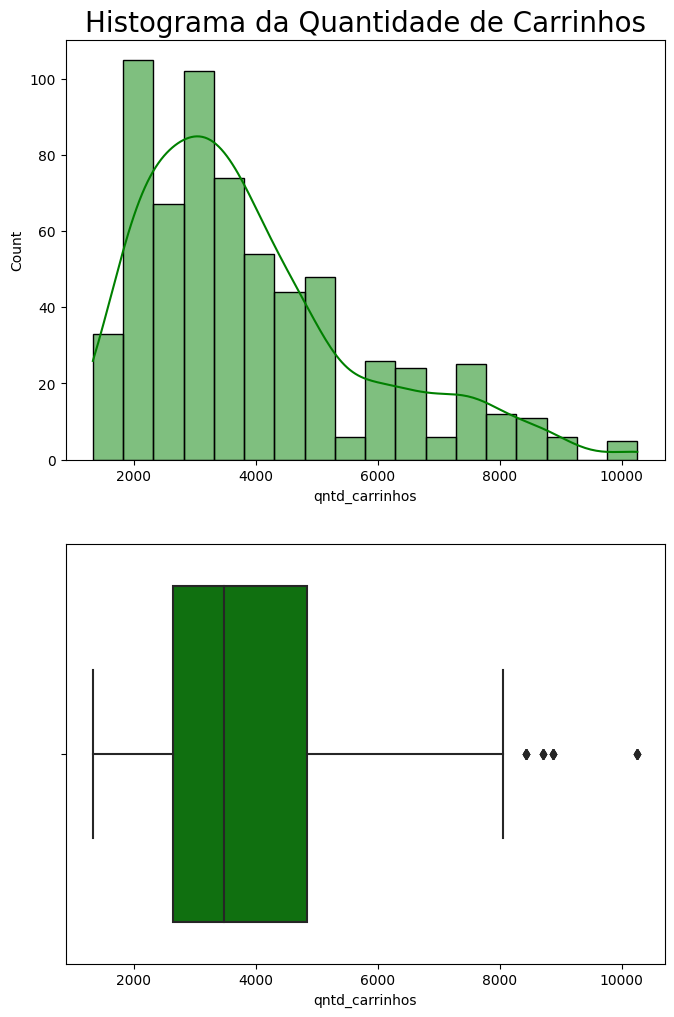

In [ ]:
# Figura
plt.figure(figsize = (17,12))

# Subplots com histogramas
# 221 = 2 linhas, 2 colunas, grafico 1; e assim sucessivamente
plt.subplot(221)
# Definindo paleta de cor
sns.color_palette("hls", 8)
# Kde = linha de densidade
sns.histplot(df['qntd_carrinhos'], kde = True, color = "green")
plt.title('Histograma da Quantidade de Carrinhos', fontsize = 20)

plt.subplot(223)
sns.boxplot(x=df['qntd_carrinhos'], color = "green")


plt.show()

In [ ]:
# colunas = list(new_df.columns)


In [ ]:
# Calculando a correlação
res = new_df[['score_inicial', 'meses_de_trabalho', 'qntd_carrinhos', 'qntd_carrinhos_danificados', 'perc_danificados']].corr()

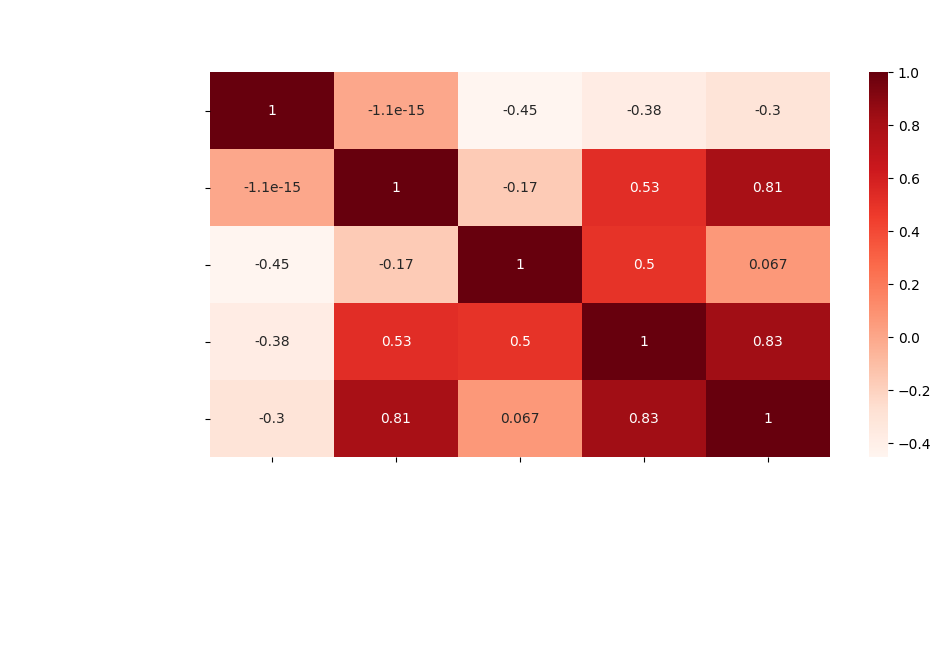

In [ ]:
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(res, annot=True, cmap="Reds")

# Configuração das linhas dos eixos x e y e da linha do título como brancas
plt.title("Mapa de Correlação\n", fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'white'})

# Configuração do nome das colunas (eixos x) como brancas
heatmap.set_xticklabels(heatmap.get_xticklabels(), color='white')

# Configuração do nome das linhas (eixos y) como brancas
heatmap.set_yticklabels(heatmap.get_yticklabels(), color='white')

# Configuração do fundo transparente
fig = plt.gcf()
fig.patch.set_alpha(0.0)
# Salva a figura com fundo transparente e linhas brancas em formato PNG
plt.savefig('mapa_correlacao.png', bbox_inches='tight', dpi=300, transparent=True)

# Exibe a figura
plt.show()

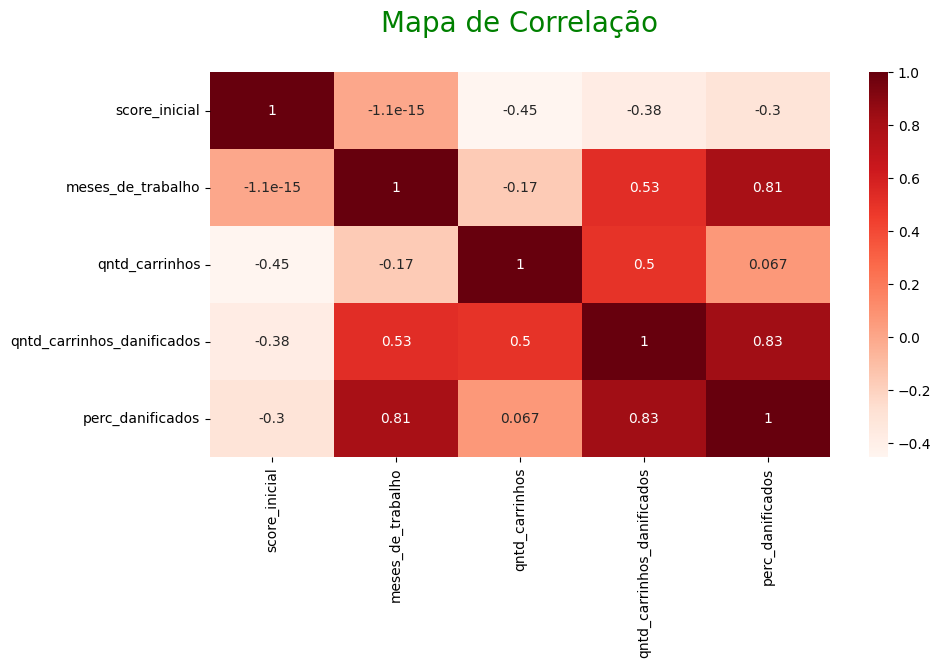

In [ ]:
# Mapa de Correlação
plt.figure(figsize = (10,5))
sns.heatmap(res, annot = True, cmap = "Reds")
plt.title("Mapa de Correlação\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})



plt.show()

### Observações

- Nota-se que a quantidade de carrinho em trabalho não impacta no percentual de carrinhos danificados, embora uma maior quantidade de carrinhos gere mais carrinhos danificados, não há um aumento real da porcentagem de danificados.
- O aumento de meses de trabalho com o mesmo carrinho impacta significativamente na porcentagem de carrinhos danificados. Isso nos mostra que quanto maior o tempo de uso de um carrinho, maior a chance dele ficar danificado.
- O aumento do score_inicial do carrinho está correlacionado negativamente com o percentual de carrinhos danificados. Isso nos permite supor que quanto maior o score do carrinho, menor a chance dele ser danificado durante o trabalho.
- Conforme aumenta-se o score_inicial do carrinho, diminui a quantidade de carrinhos trabalhando. Embora eu não conheça o processo, custo e método de avaliação para o score, isso pode nos indiciar que há uma maior dificuldade em conseguir carrinhos com maior score. Essa dedução pode ser valiosa na hora de propor uma solução para o problema.


In [ ]:
carrinhos_danificados_percent = new_df.groupby(["score_inicial"])["perc_danificados"].agg(['mean']).rename(columns = {'mean': 'média_danificados_perc'}).reset_index()

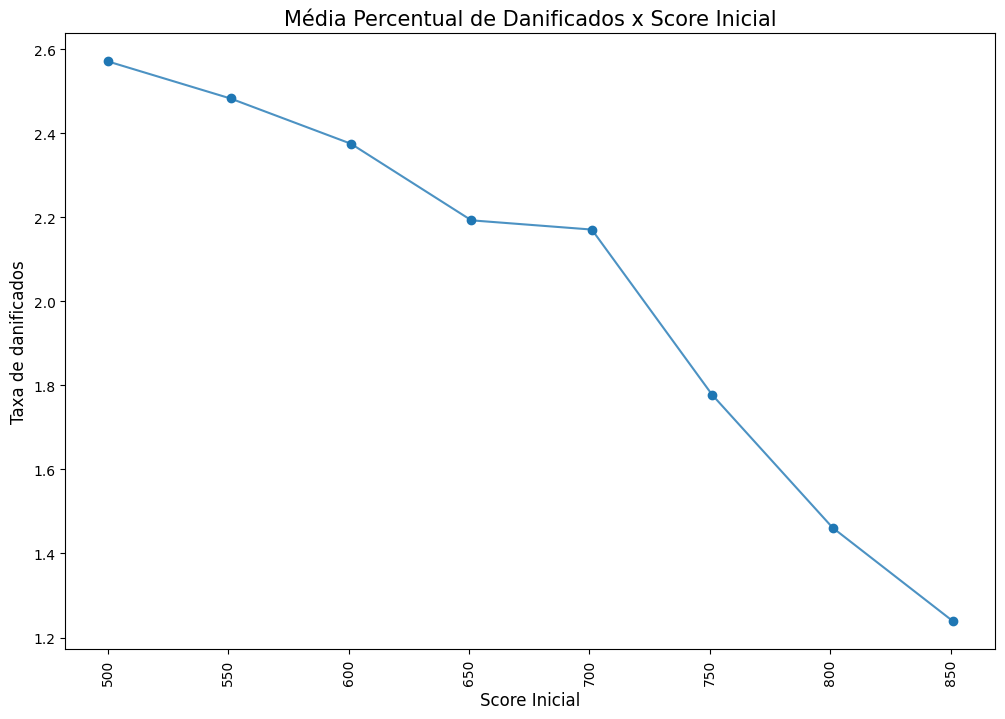

In [ ]:
# Plot
plt.figure(figsize = (12,8))
plt.plot(list(carrinhos_danificados_percent['score_inicial']), carrinhos_danificados_percent['média_danificados_perc'].values, alpha=0.8)
plt.scatter(list(carrinhos_danificados_percent['score_inicial']), carrinhos_danificados_percent['média_danificados_perc'].values)
plt.ylabel('Taxa de danificados', fontsize = 12)
plt.xlabel('Score Inicial', fontsize = 12)
plt.title("Média Percentual de Danificados x Score Inicial", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.show()


In [ ]:
meses_perc_danificados = new_df.groupby(["meses_de_trabalho"])["perc_danificados"].agg(['mean']).rename(columns = {'mean': 'média_danificados_perc'}).reset_index()

### Verificando se há algum mês ou periodos em que ocorrem as danificações com mais frequencia

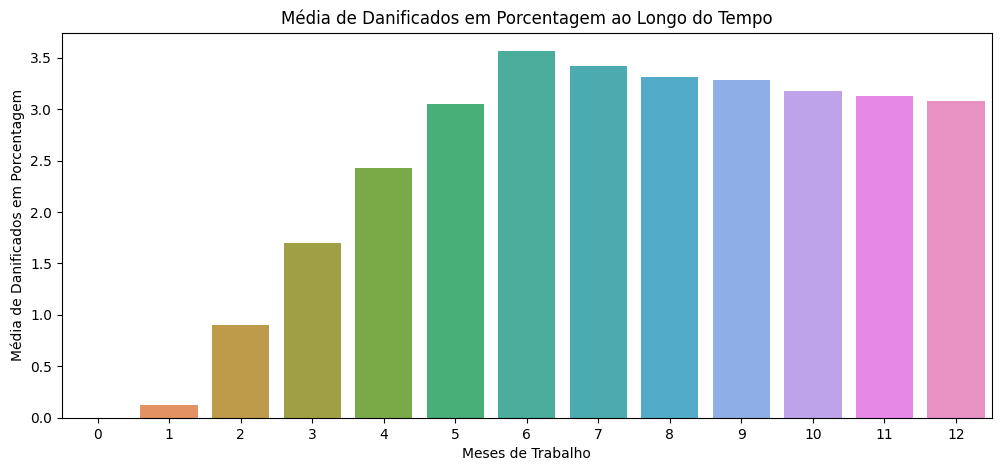

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(x=meses_perc_danificados['meses_de_trabalho'], y=meses_perc_danificados['média_danificados_perc'])
plt.xlabel('Meses de Trabalho')
plt.ylabel('Média de Danificados em Porcentagem')
plt.title('Média de Danificados em Porcentagem ao Longo do Tempo')
plt.show()


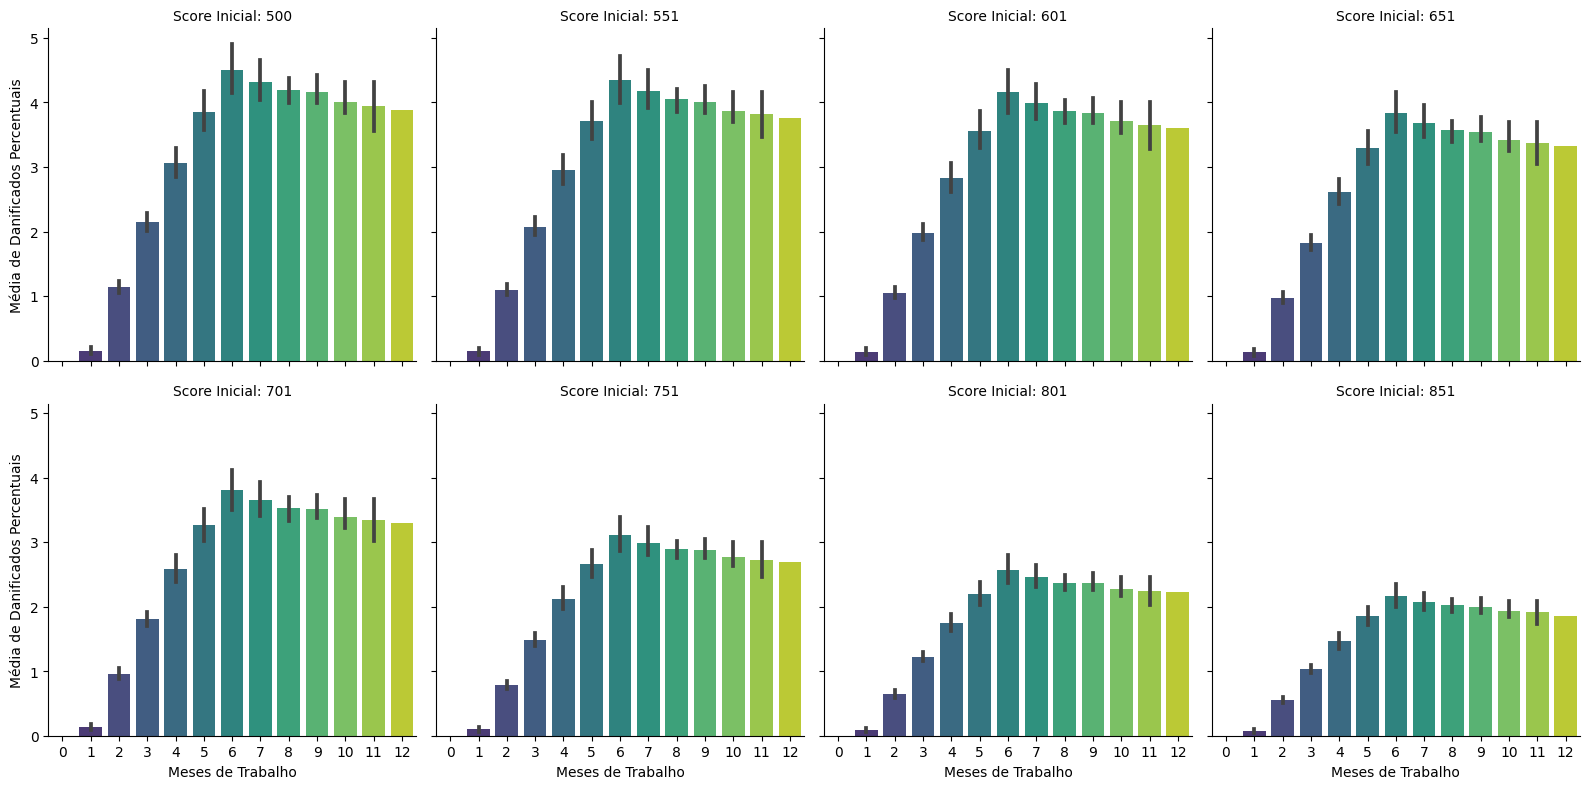

In [ ]:
# Média em porcentagem de carrinhos danificados por Score
g = sns.FacetGrid(new_df, col='score_inicial', col_wrap=4, height=4)
g.map(sns.barplot, 'meses_de_trabalho', 'perc_danificados', palette='viridis')
# Adiciona linha de densidade
g.set_axis_labels('Meses de Trabalho', 'Média de Danificados Percentuais')
g.set_titles('Score Inicial: {col_name}')
plt.show()

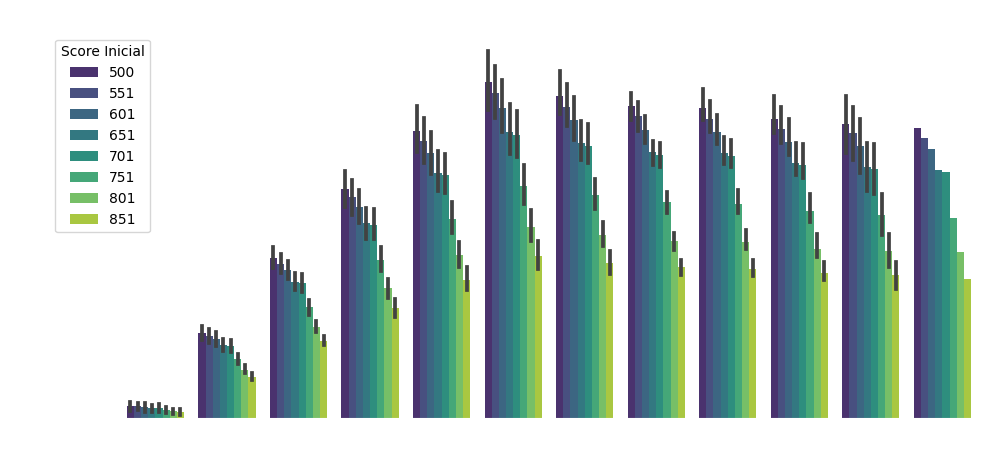

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='meses_de_trabalho', y='perc_danificados', hue='score_inicial', data=new_df, palette='viridis')

# Configuração das linhas e descrições como brancas
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.xlabel('Meses de Trabalho', color='white')
plt.ylabel('Média de Danificados Percentuais', color='white')
plt.title('Média de Danificados Percentuais ao Longo do Tempo', color='white')
plt.legend(title='Score Inicial', loc='upper left')

# Configuração do fundo transparente
fig = plt.gcf()
fig.patch.set_alpha(0.0)
# Salva a figura com fundo transparente e linhas brancas em formato PNG
plt.savefig('mapa_correlacao.png', bbox_inches='tight', dpi=300, transparent=True)

plt.show()

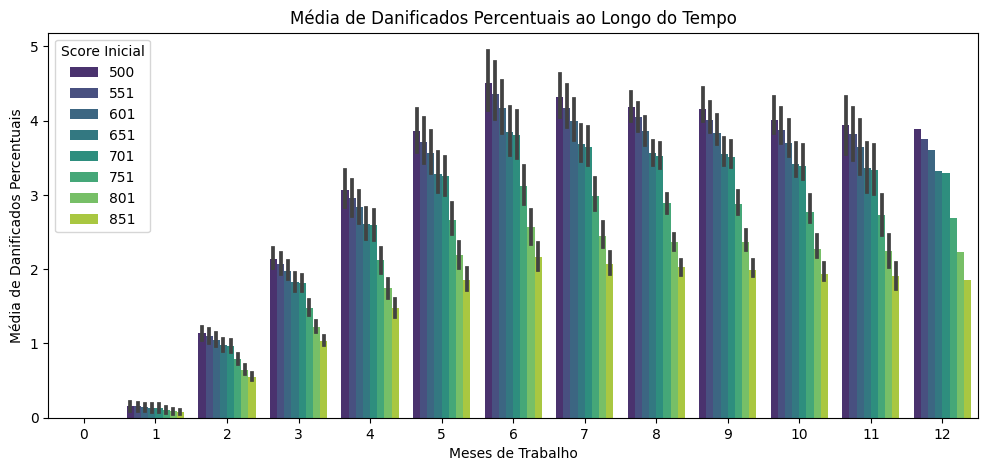

In [ ]:
# Média em porcentagem de carrinhos danificados por Score
plt.figure(figsize=(12, 5))
sns.barplot(x='meses_de_trabalho', y='perc_danificados', hue='score_inicial', data=new_df, palette='viridis')
plt.xlabel('Meses de Trabalho')
plt.ylabel('Média de Danificados Percentuais')
plt.title('Média de Danificados Percentuais ao Longo do Tempo')
plt.legend(title='Score Inicial', loc='upper left')
plt.show()

## Conclusão e Proposta

Após essa breve análise, nota-se que o score do carrinho está formetemente relacionada a duração do mesmo, isto é, quanto maior o score do carrinho, menor a chance dele danificar.

Não possuo conhecimento o suficiente da área, então tem varios fatores que eu poderia considerar, como também não deveria considerar.

O fato de haver uma quantidade menor de carrinhos com alto score, me faz acreditar que são mais raros, podendo ter um alto custo de produção e manutenção.

Considerando também que a empresa atue em outras areas fora das praias, a sugestão é que fosse feito um estudo/análise a respeito do valor para o transporte dos carrinhos até a praia.

Após essa ánalise, e se for viavel a ideia seria que houvesse um rodizio dos carrinhos atuando na praia, podendo ser da seguinte forma:

Os carrinhos de score 500-600 atuariam apenas 3 meses na praia e retornaria para atuar em outro local

Os carrinhos de score 601-750 atuariam apenas 4 meses na praia e retornaria para atuar em outro local

Os carrinhos de score 750+ atuariam 6 meses na praia e retornaria para atuar em outro local

A ideia seria que com esse rodizio ocorra uma menor quantidade de carrinhos danificados, aprimorando a performance de vendas e reduzindo o custo com manutenções nos carrinhos. Em contrapartida haveria um custo para o trasporte constante. Para responder a essas questões seria necessário mais informações ou um maior conhecimento sobre o negócio em questão.

In [ ]:
# Exportando o csv inicial e o csv manipulado
df.to_csv('case_itau_tratado.csv', index=False)
new_df.to_csv('case_itau_manipulado.csv', index=False)

## BÔNUS: MACHINE LEARNING



Apenas para diversão e teste do meu conhecimento vamos verificar se há algum modelo de machine learning que poderia nos ajudar a prever quantos carrinhos possivelmente podem ser danificados durante os meses de trabalho na praia.

Para um aprendizado de maquina (ML) ser efetivo, é necessário que haja historico de dados e que seja realizado muitos testes afim de encontrar o melhor modelo, juntamente com seus melhores parametros (que é a parte mais dificil)

Para o nosso case, tentarei realizar 3 testes afim de encontrar o melhor modelo:
- O dataset com alguns dados redundantes, como a coluna perc_porcentagem
- Sem os dados reduntantes
- Aplicando ONE (One Hot Enconder) nas colunas de meses_em_trabalho e também na coluna status_inicial afim de melhorar o desempenho de nossa previsão.

A eficiencia do nosso modelo será avaliado pela acúcaria obtido pelo mesmo.

### OneHotEncoder na coluna Embarked: Por quê

- OneHotEncoder é uma técnica de pré-processamento usada em aprendizado de máquina para lidar com variáveis categóricas. Ele converte variáveis categóricas em uma representação binária, criando uma nova coluna para cada categoria com valores binários indicando a presença ou ausência dessa categoria.

- Essa técnica é especialmente interessante por que há um pequeno número de categorias (meses e score), melhorando a eficiencia de aprendizado de máquina, Permitindo que o modelo compreenda e utilize efetivamente informações de variáveis categóricas em seus cálculos.

    - Ao criar colunas binárias para cada local de embarque, o modelo pode interpretar de maneira mais eficaz as informações categóricas, melhorando a capacidade preditiva do algoritmo. Essa abordagem é especialmente relevante quando lidamos com um conjunto de dados contendo um número restrito de categorias, contribuindo para a interpretação e desempenho aprimorados do modelo.
    

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   database                    648 non-null    int64  
 1   score_inicial               648 non-null    int64  
 2   score_final                 648 non-null    int64  
 3   meses_de_trabalho           648 non-null    int64  
 4   qntd_carrinhos              648 non-null    int64  
 5   qntd_carrinhos_danificados  648 non-null    int64  
 6   perc_danificados            648 non-null    float64
 7   id_database                 648 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 40.6+ KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def table_score(X_train, X_test, Y_train, Y_test):

  logreg = LogisticRegression()
  logreg.fit(X_train, Y_train)
  Y_pred = logreg.predict(X_test)
  acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

  svc = SVC()
  svc.fit(X_train, Y_train)
  Y_pred = svc.predict(X_test)
  acc_svc = round(svc.score(X_train, Y_train) * 100, 2)

  knn = KNeighborsClassifier(n_neighbors = 3)
  knn.fit(X_train, Y_train)
  Y_pred = knn.predict(X_test)
  acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

  gaussian = GaussianNB()
  gaussian.fit(X_train, Y_train)
  Y_pred = gaussian.predict(X_test)
  acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

  perceptron = Perceptron()
  perceptron.fit(X_train, Y_train)
  Y_pred = perceptron.predict(X_test)
  acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

  linear_svc = LinearSVC()
  linear_svc.fit(X_train, Y_train)
  Y_pred = linear_svc.predict(X_test)
  acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

  sgd = SGDClassifier()
  sgd.fit(X_train, Y_train)
  Y_pred = sgd.predict(X_test)
  acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

  decision_tree = DecisionTreeClassifier()
  decision_tree.fit(X_train, Y_train)
  Y_pred = decision_tree.predict(X_test)
  acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
  acc_decision_tree

  random_forest = RandomForestClassifier(n_estimators=100)
  random_forest.fit(X_train, Y_train)
  Y_pred = random_forest.predict(X_test)
  random_forest.score(X_train, Y_train)
  acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

  models = pd.DataFrame({
      'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
                'Random Forest', 'Naive Bayes', 'Perceptron',
                'Stochastic Gradient Decent', 'Linear SVC',
                'Decision Tree'],
      'Score': [acc_svc, acc_knn, acc_log,
                acc_random_forest, acc_gaussian, acc_perceptron,
                acc_sgd, acc_linear_svc, acc_decision_tree]})
  models.sort_values(by='Score', ascending=False)

  return models

In [ ]:
# Com a tabela 'perc_danificados'
X = new_df.drop(['database','score_final', 'qntd_carrinhos_danificados','id_database'],axis=1)
y = new_df.qntd_carrinhos_danificados

# Separando em treino e validação
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
table_score(X_train, X_test, Y_train, Y_test)

,Model,Score
0,Support Vector Machines,11.75
1,KNN,32.26
2,Logistic Regression,11.06
3,Random Forest,100.00
4,Naive Bayes,55.76
5,Perceptron,0.69
6,Stochastic Gradient Decent,1.15
7,Linear SVC,1.15
8,Decision Tree,100.00


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [ ]:
new_df.drop(['database', 'qntd_carrinhos_danificados','id_database'],axis=1)

,score_inicial,score_final,meses_de_trabalho,qntd_carrinhos,perc_danificados
0,500,550,0,2960,0.000000
1,500,550,1,2960,0.000000
2,500,550,2,2960,0.945946
3,500,550,3,2960,2.094595
4,500,550,4,2960,2.905405
...,...,...,...,...,...
643,851,900,0,2058,0.000000
644,851,900,1,2058,0.097182
645,851,900,2,2058,0.680272
646,851,900,3,2058,1.214772


In [ ]:
new_df.iloc[247]

database                        203301
score_inicial                      651
score_final                        700
meses_de_trabalho                    4
qntd_carrinhos                    4844
qntd_carrinhos_danificados         119
perc_danificados              2.456647
id_database                    1-651.0
Name: 247, dtype: object

In [ ]:
new_df.iloc[547]

database                        203306
score_inicial                      801
score_final                        850
meses_de_trabalho                    6
qntd_carrinhos                    2682
qntd_carrinhos_danificados          78
perc_danificados              2.908277
id_database                    6-801.0
Name: 547, dtype: object

In [ ]:
# Testando o modelo / Validação dos dados:
novos_dados = pd.DataFrame({
    'score_inicial': [651, 801],
    'meses_de_trabalho': [4, 6],
    'qntd_carrinhos': [5415, 2145],
    'perc_danificados': [2.456647, 2.908277]
})
previsoes = random_forest.predict(novos_dados)

resultados = pd.DataFrame({
    'score_inicial': novos_dados['score_inicial'],
    'meses_de_trabalho': novos_dados['meses_de_trabalho'],
    'qntd_carrinhos': novos_dados['qntd_carrinhos'],
    'previsao': previsoes,
    'perc_danificados':  novos_dados['perc_danificados'],
    'perc_danificados_prev': round((previsoes/novos_dados['qntd_carrinhos']*100),2)
})

resultados

,score_inicial,meses_de_trabalho,qntd_carrinhos,previsao,perc_danificados,perc_danificados_prev
0,651,4,5415,160,2.456647,2.95
1,801,6,2145,61,2.908277,2.84


In [ ]:
# Sem a tabela 'perc_danificados'
X = new_df.drop(['database', 'score_final', 'qntd_carrinhos_danificados','id_database'],axis=1)
y = new_df.qntd_carrinhos_danificados

# Separando em treino e validação
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
table_score(X_train, X_test, Y_train, Y_test)

,Model,Score
0,Support Vector Machines,11.75
1,KNN,32.26
2,Logistic Regression,11.06
3,Random Forest,100.00
4,Naive Bayes,55.76
5,Perceptron,0.69
6,Stochastic Gradient Decent,0.69
7,Linear SVC,0.69
8,Decision Tree,100.00


In [ ]:
# Testando o modelo / Validação dos dados:
novos_dados = pd.DataFrame({
    'score_inicial': [651, 801],
    'meses_de_trabalho': [4, 6],
    'qntd_carrinhos': [5415, 2145],
    'perc_danificados': [2.456647, 2.908277]
})
previsoes = random_forest.predict(novos_dados)

resultados = pd.DataFrame({
    'score_inicial': novos_dados['score_inicial'],
    'meses_de_trabalho': novos_dados['meses_de_trabalho'],
    'qntd_carrinhos': novos_dados['qntd_carrinhos'],
    'previsao': previsoes,
    'perc_danificados':  novos_dados['perc_danificados'],
    'perc_danificados_prev': round((previsoes/novos_dados['qntd_carrinhos']*100),2)
})

resultados

,score_inicial,meses_de_trabalho,qntd_carrinhos,previsao,perc_danificados,perc_danificados_prev
0,651,4,5415,160,2.456647,2.95
1,801,6,2145,61,2.908277,2.84


In [ ]:
# Testando o modelo / Validação dos dados:
novos_dados = pd.DataFrame({
    'score_inicial': new_df['score_inicial'],
    'meses_de_trabalho': new_df['meses_de_trabalho'],
    'qntd_carrinhos': new_df['qntd_carrinhos'],
    'perc_danificados': new_df['perc_danificados']
})
previsoes = random_forest.predict(novos_dados)

resultados = pd.DataFrame({
    'score_inicial': novos_dados['score_inicial'],
    'meses_de_trabalho': novos_dados['meses_de_trabalho'],
    'qntd_carrinhos': novos_dados['qntd_carrinhos'],
    'previsao': previsoes,
    'perc_danificados':  novos_dados['perc_danificados'],
    'perc_danificados_prev': round((previsoes/novos_dados['qntd_carrinhos']*100),2)
})

resultados

,score_inicial,meses_de_trabalho,qntd_carrinhos,previsao,perc_danificados,perc_danificados_prev
0,500,0,2960,0,0.000000,0.00
1,500,1,2960,0,0.000000,0.00
2,500,2,2960,33,0.945946,1.11
3,500,3,2960,62,2.094595,2.09
4,500,4,2960,86,2.905405,2.91
...,...,...,...,...,...,...
643,851,0,2058,0,0.000000,0.00
644,851,1,2058,2,0.097182,0.10
645,851,2,2058,14,0.680272,0.68
646,851,3,2058,25,1.214772,1.21


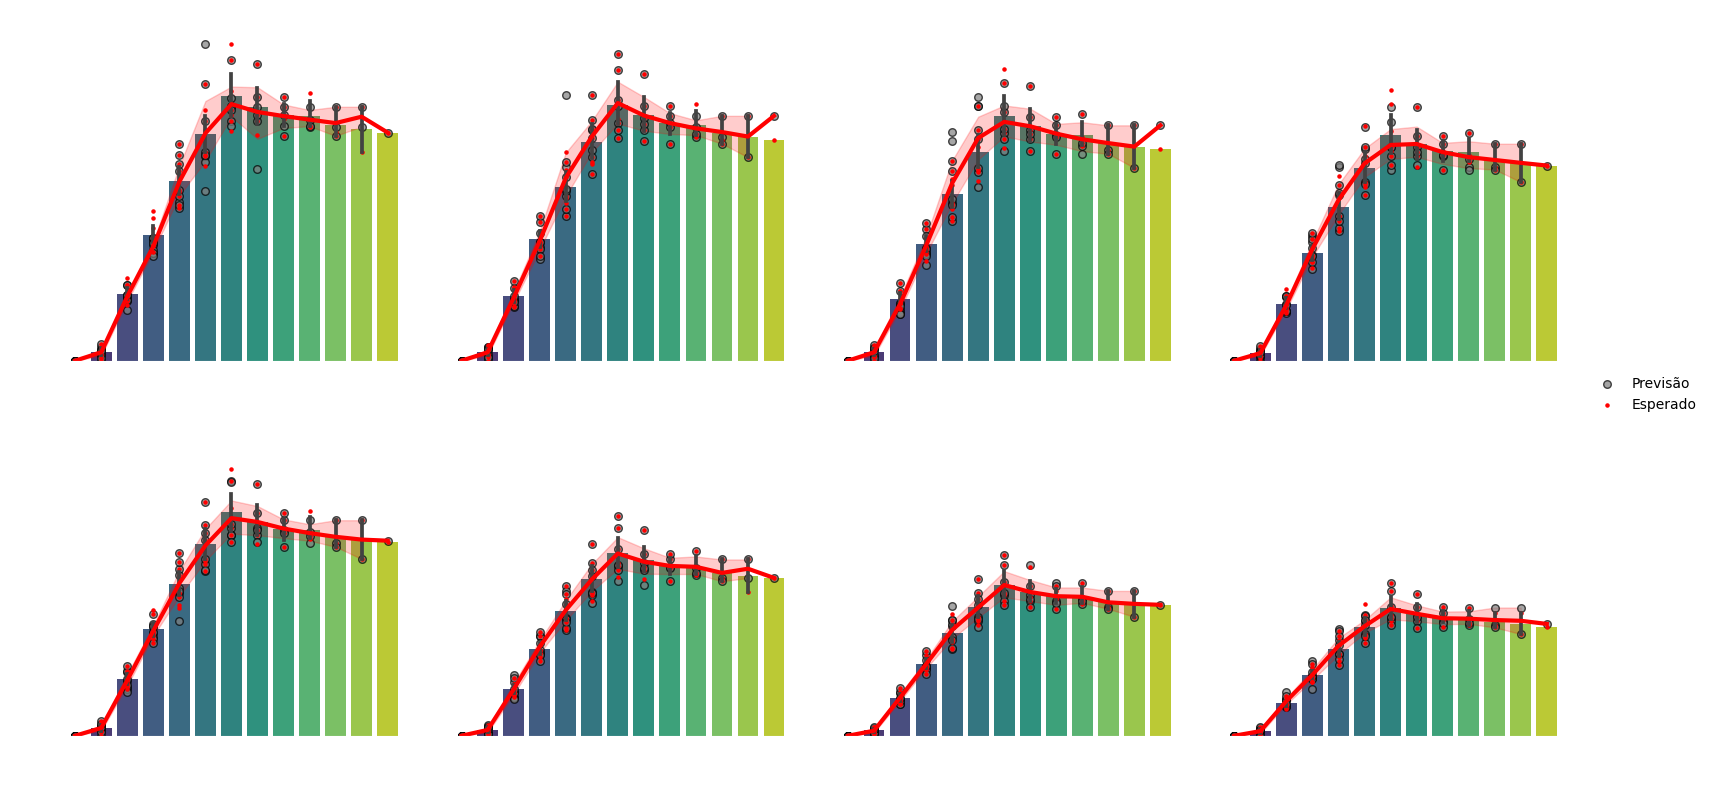

In [ ]:
new_df['perc_danificados_prev'] = (random_forest.predict(X)/new_df['qntd_carrinhos'])*100  # Substitua X pelos seus dados de entrada

g = sns.FacetGrid(new_df, col='score_inicial', col_wrap=4, height=4)
g.map(sns.barplot, 'meses_de_trabalho', 'perc_danificados', palette='viridis')
g.map(sns.lineplot, 'meses_de_trabalho', 'perc_danificados_prev', color='red', linewidth=3)
g.map(plt.scatter, 'meses_de_trabalho', 'perc_danificados_prev', color='gray', edgecolor='black', s=30, alpha=0.7, label='Previsão')
g.map(plt.scatter, 'meses_de_trabalho', 'perc_danificados', color='red', s=5, label='Esperado')

# Configuração de linhas e descrições como brancas
for ax in g.axes.flat:
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')

    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')

    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

# Configuração do título do gráfico como branco
g.set_titles('Score Inicial: {col_name}', color='white')

# Adição da legenda
g.add_legend()

# Configuração dos rótulos dos eixos
g.set_axis_labels('Meses de Trabalho', 'Média de Danificados Percentuais')

# Configuração do fundo transparente
fig = plt.gcf()
fig.patch.set_alpha(0.0)
# Salva a figura com fundo transparente e linhas brancas em formato PNG
plt.savefig('mapa_previsao.png', bbox_inches='tight', dpi=300, transparent=True)

plt.show()

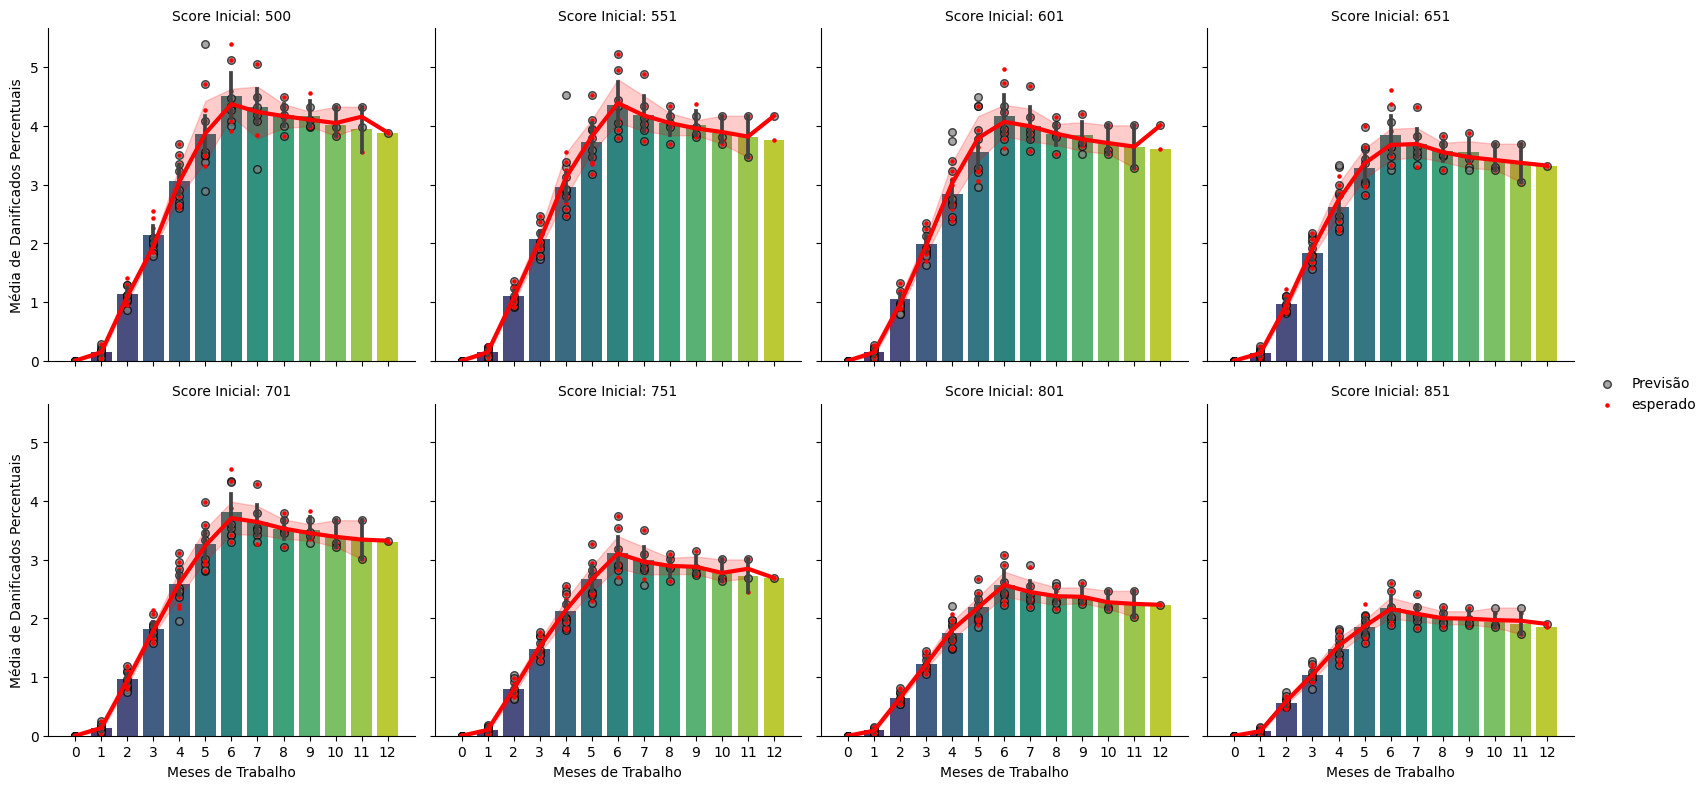

In [ ]:
# Grafico com a linha de dados da previsão. Em vermelho os dados esperados e em cinza com bordas preta, os dados previstos pelo modelo.

new_df['perc_danificados_prev'] = (random_forest.predict(X)/new_df['qntd_carrinhos'])*100  # Substitua X pelos seus dados de entrada

g = sns.FacetGrid(new_df, col='score_inicial', col_wrap=4, height=4)
g.map(sns.barplot, 'meses_de_trabalho', 'perc_danificados', palette='viridis')
g.map(sns.lineplot, 'meses_de_trabalho', 'perc_danificados_prev', color='red', linewidth=3)
g.map(plt.scatter, 'meses_de_trabalho', 'perc_danificados_prev', color='gray', edgecolor='black', s=30, alpha=0.7, label='Previsão')
g.map(plt.scatter, 'meses_de_trabalho', 'perc_danificados', color='red', s=5, label='esperado')

g.add_legend()

g.set_axis_labels('Meses de Trabalho', 'Média de Danificados Percentuais')
g.set_titles('Score Inicial: {col_name}')

# Configuração do fundo transparente
fig = plt.gcf()
fig.patch.set_alpha(0.0)
# Salva a figura com fundo transparente e linhas brancas em formato PNG
plt.savefig('mapa_correlacao.png', bbox_inches='tight', dpi=300, transparent=True)

plt.show()

## Conclusões com o ML

Realizei os estudos aplicando também o OneHotEnconder mas acabou ficando uma linha de código extensa e confusa. Decidi por não enviar a parte com OneHotEnconder para não extender tanto a avaliação.



### Discussão

O teste de acuracia apontou 100% mas não preveu os resultados corretamente, porque?

Acredito que ocorreu um overfitting. Isso significa que embora o modelo tenha demonstrado 100% de acurácia, o modelo não conseguiu aprender o suficiente para prever o resultado e isso pode ter ocorrido pelos seguintes motivos:

- Poucos dados de treinamento: Se o conjunto de treinamento é pequeno, o modelo pode aprender padrões específicos desses dados, em vez de padrões mais amplos que podem ser aplicados a outros conjuntos de dados.

- Desempenho inferior em dados não vistos: Quando o modelo é testado em dados que não foram usados durante o treinamento, sua performance é significativamente pior do que nos dados de treinamento.

O teste foi realizado apenas com 33% do dataset. resultando em 216 dados treinados. Além de ser um baixo número de dados para o treinamento, os dados são muito semelhantes e muita vezes acaba sendo reduntante, fazendo com que o modelo de aprendizado acaba "decorando" os dados de treinamento em vez de aprender padrões que podem ser aplicados a novos conjuntos de dados.